In [1]:
import numpy as np
import pandas as pd

In [2]:
#載入資料
data = pd.read_csv('customer behavior.csv')

In [3]:
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
#將 Satisfaction Level那列印出
for d in data['Satisfaction Level']:
    print(d)

Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
nan
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Satisfied
Unsatisfied
Satisfied
Unsatisfied
Neutral
Satisfied
Neutral
Unsatisfied
Satisf

In [6]:
#計算滿意程度
Satisfied = 0
Unsatisfied = 0
Neutral = 0
for d in data['Satisfaction Level']:
    if d == 'Satisfied':
        Satisfied +=1
    if d == 'Unsatisfied':
        Unsatisfied +=1
    if d == 'Neutral':
        Neutral +=1
print('Satisfied有', Satisfied, '個')
print('Unsatisfied有', Unsatisfied, '個')
print('Neutral有', Neutral, '個')
print('顧客滿意的比例為', round(Satisfied*100/350, 2), '%')
print('顧客不滿意的比例為', round(Unsatisfied*100/350, 2), '%')
print('顧客覺得中立的比例為', round(Neutral*100/350, 2), '%')

Satisfied有 125 個
Unsatisfied有 116 個
Neutral有 107 個
顧客滿意的比例為 35.71 %
顧客不滿意的比例為 33.14 %
顧客覺得中立的比例為 30.57 %


In [7]:
#找出缺失值在哪幾行
rows_with_null = data[data.isnull().any(axis=1)]
rows_with_null

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
71,172,Female,37,Houston,Bronze,420.8,7,3.1,False,21,NaN
143,244,Female,37,Houston,Bronze,430.8,7,3.4,False,23,NaN


In [8]:
#找出當rating=3.1時，顧客的滿意度為何
satisfied_count_rating_3_1 = data[data['Average Rating'] == 3.1]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_1 

Neutral    16
Name: Satisfaction Level, dtype: int64

In [9]:
#找出當rating=3.4時，顧客的滿意度為何
satisfied_count_rating_3_4 = data[data['Average Rating'] == 3.4]['Satisfaction Level'].value_counts()
satisfied_count_rating_3_4 

Neutral        17
Unsatisfied     1
Name: Satisfaction Level, dtype: int64

In [10]:
#缺失值用看缺失那行的rating為何，再用rating去數顧客滿意度分別為何。以上來看當rating=3.1或3.4時，顧客滿意度最多的是Neutral
data['Satisfaction Level'] = data['Satisfaction Level'].fillna('Neutral')

In [11]:
#Satisfaction Level的缺失值補滿了
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [12]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='count'>

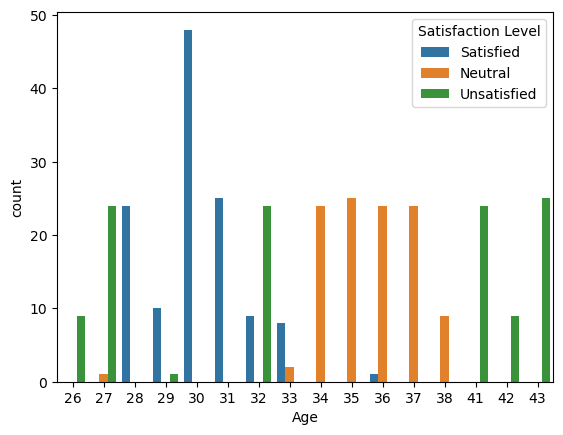

In [14]:
#各年齡的滿意度數量
sns.countplot(x=data['Age'], hue=data['Satisfaction Level'])

<Axes: xlabel='Average Rating', ylabel='count'>

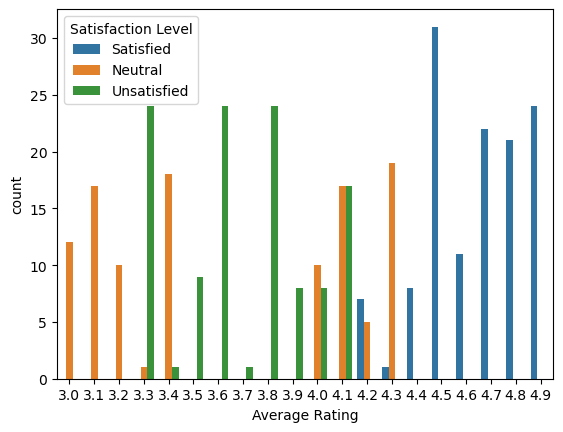

In [15]:
#各平均評分的滿意度數量
sns.countplot(x=data['Average Rating'], hue=data['Satisfaction Level'])

<Axes: xlabel='Gender', ylabel='count'>

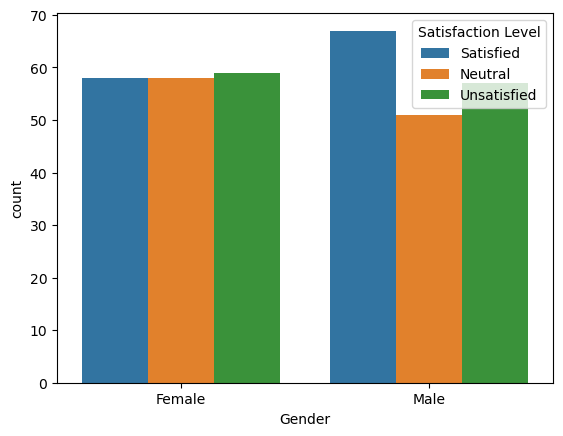

In [16]:
#男女的滿意程度
sns.countplot(x=data['Gender'], hue=data['Satisfaction Level'])

<Axes: xlabel='Discount Applied', ylabel='count'>

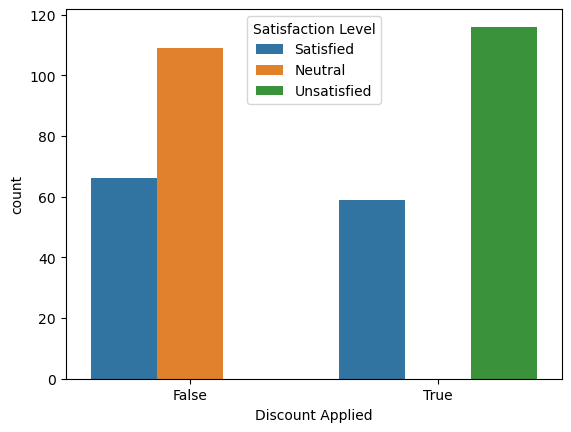

In [17]:
#使用優惠的滿意度
sns.countplot(x=data['Discount Applied'], hue=data['Satisfaction Level'])

<Axes: xlabel='City', ylabel='count'>

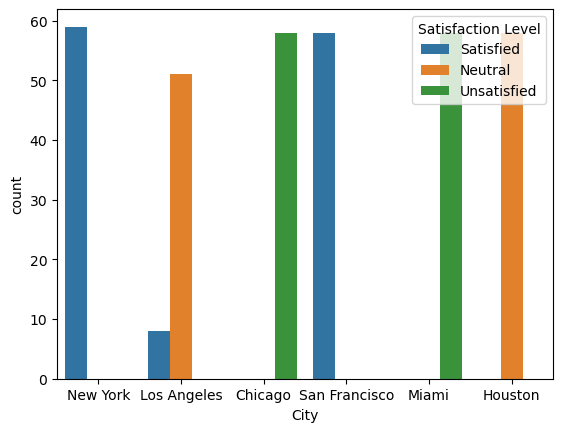

In [18]:
#城市的滿意度
sns.countplot(x=data['City'], hue=data['Satisfaction Level'])

/Users/serene0215/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/serene0215/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/U

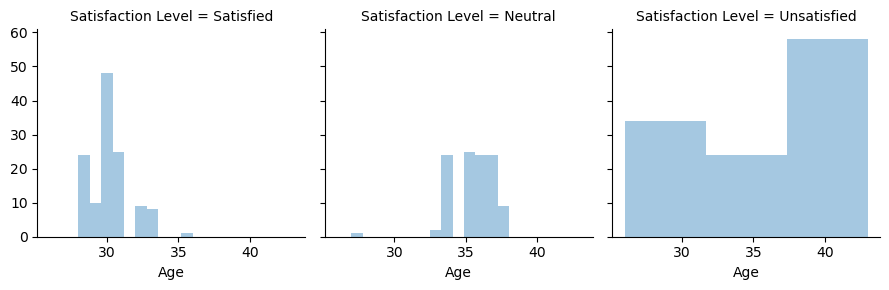

In [19]:
g = sns.FacetGrid(data, col='Satisfaction Level') #col='Satisfaction LevelSatisfaction Level'参数指定了按照'Satisfaction Level'列进行分组
g.map(sns.distplot, 'Age', kde=False)
#30歲後年齡層的整體滿意度不好

In [20]:
#將類別資料轉為整數
data['Gender'] = data['Gender'].astype('category').cat.codes#Female=0,Male=1
data['City'] = data['City'].astype('category').cat.codes#Chicago=0,Houston=1,LA=2,Miami=3,NY=4,San Francisco=5
data['Membership Type'] = data['Membership Type'].astype('category').cat.codes#Bronze=0,Gold=1,Silver=2
data['Discount Applied'] = data['Discount Applied'].astype('category').cat.codes#False=0,True=1
data['Satisfaction Level'] = data['Satisfaction Level'].astype('category').cat.codes#Neutral=0,Satisfied=1,Unsatisfied=2

In [21]:
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,4,1,1120.20,14,4.6,1,25,1
1,102,1,34,2,2,780.50,11,4.1,0,18,0
2,103,0,43,0,0,510.75,9,3.4,1,42,2
3,104,1,30,5,1,1480.30,19,4.7,0,12,1
4,105,1,27,3,2,720.40,13,4.0,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,3,2,660.30,10,3.8,1,42,2
346,447,0,36,1,0,470.50,8,3.0,0,27,0
347,448,0,30,4,1,1190.80,16,4.5,1,28,1
348,449,1,34,2,2,780.20,11,4.2,0,21,0


In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [23]:
#切分訓練集為0.7,測試集為0.3
X_train, X_test, y_train, y_test = train_test_split(
    data[['Gender','Age','City','Membership Type','Total Spend','Items Purchased','Average Rating','Discount Applied','Days Since Last Purchase']], data[['Satisfaction Level']], test_size=0.3, random_state=0, shuffle=True)

In [24]:
print("原始數據類別分布:", Counter(y_train['Satisfaction Level']))

原始數據類別分布: Counter({1: 87, 2: 81, 0: 77})


In [25]:
smote = SMOTE(sampling_strategy={0: 3087, 1: 3081, 2: 3077}, random_state=0)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)
print("過採樣後的數據類別分佈:", Counter(y_train_smo['Satisfaction Level']))

過採樣後的數據類別分佈: Counter({0: 3087, 1: 3081, 2: 3077})


/Users/serene0215/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (3087) in class 0 will be larger than the number of samples in the majority class (class #1 -> 87)
  warnings.warn(
/Users/serene0215/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (3081) in class 1 will be larger than the number of samples in the majority class (class #1 -> 87)
  warnings.warn(
/Users/serene0215/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (3077) in class 2 will be larger than the number of samples in the majority class (class #1 -> 87)
  warnings.warn(


In [27]:
#使用隨機森量模型
forest = RandomForestClassifier(random_state=0)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize #將多類別標籤轉換成二進制格式

In [30]:
forest.fit(X_train_smo, y_train_smo)

/var/folders/wq/4v_njlkn6w747735rq1pfdqw0000gn/T/ipykernel_49727/2995872584.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_smo, y_train_smo)


RandomForestClassifier(random_state=0)

In [31]:
#對測試集X_test預測，並使用predict_proba取得每個樣本屬於各个類別的機率。
y_score = forest.predict_proba(X_test)

In [32]:
y_test_new = label_binarize(y_test, classes=[0, 1, 2])

In [37]:
from sklearn import metrics
forest.fit(X_train_smo, y_train_smo) #使用隨機森林
y_score = forest.predict_proba(X_test) #對測試集X_test預測，並使用predict_proba取得每個樣本屬於各個類別的機率
y_test_new = label_binarize(y_test, classes=[0, 1, 2]) #將標籤轉換成一個二維數組
print('auc:', metrics.roc_auc_score(y_test_new, y_score, average='macro'))

/var/folders/wq/4v_njlkn6w747735rq1pfdqw0000gn/T/ipykernel_49727/3882753118.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_smo, y_train_smo) #使用隨機森林


auc: 1.0


In [38]:
X_train_smo

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,1,26,3,2,690.600000,12,3.900000,1,47
1,0,30,4,1,1200.800000,16,4.700000,1,24
2,1,30,5,1,1470.500000,20,4.800000,0,13
3,1,30,5,1,1470.500000,20,4.800000,0,13
4,1,34,2,2,780.500000,11,4.100000,0,18
...,...,...,...,...,...,...,...,...,...
9240,1,32,3,2,670.300000,10,3.800000,1,33
9241,0,42,0,0,518.914263,9,3.436097,1,37
9242,0,43,0,0,505.750000,10,3.300000,1,39
9243,0,42,0,0,526.712144,9,3.500000,1,37
